In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

# Replace 'https://raw.githubusercontent.com/user/repo/branch/filename.csv' with the actual URL of your CSV file on GitHub
url_1 = 'https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/donations_facility.csv'
url_2 = 'https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/donations_state.csv'
url_3 = 'https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/newdonors_facility.csv'
url_4 = 'https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/newdonors_state.csv'

# Read CSV file into a DataFrame
df_donations_facility = pd.read_csv(url_1)
df_donations_state = pd.read_csv(url_2)
df_newdonors_facility = pd.read_csv(url_3)
df_newdonors_state = pd.read_csv(url_4)
# Display the DataFrame


In [3]:
import pandas as pd

# Replace 'https://raw.githubusercontent.com/user/repo/branch/filename.csv' with the actual URL of your CSV file on GitHub
url_1 = 'https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/donations_facility.csv'

# Read CSV file into a DataFrame
df_donations_facility = pd.read_csv(url_1)

# Print all distinct hospital names
distinct_hospitals = df_donations_facility['hospital'].unique()
print("Distinct Hospitals:")
for hospital_name in distinct_hospitals:
    print(hospital_name)


Distinct Hospitals:
Hospital Sultanah Nora Ismail
Hospital Sultanah Aminah
Hospital Sultanah Bahiyah
Hospital Raja Perempuan Zainab II
Hospital Melaka
Hospital Tuanku Jaafar
Hospital Tengku Ampuan Afzan
Hospital Sultan Haji Ahmad Shah
Hospital Seberang Jaya
Hospital Pulau Pinang
Hospital Raja Permaisuri Bainun
Hospital Taiping
Hospital Seri Manjung
Hospital Tengku Ampuan Rahimah
Hospital Sultanah Nur Zahirah
Hospital Queen Elizabeth II
Hospital Duchess Of Kent
Hospital Tawau
Hospital Umum Sarawak
Hospital Miri
Hospital Sibu
Pusat Darah Negara


In [4]:
df_donations_facility = pd.read_csv(url_1)

# Define a mapping of hospitals to regions
hospital_region_mapping = {
    'Hospital Sultanah Nora Ismail': 'Southern Region',
    'Hospital Sultanah Aminah': 'Southern Region',
    'Hospital Sultanah Bahiyah': 'Northern Region',
    'Hospital Raja Perempuan Zainab II': 'Northern Region',
    'Hospital Melaka': 'Southern Region',
    'Hospital Tuanku Jaafar': 'Southern Region',
    'Hospital Tengku Ampuan Afzan': 'Central Region',
    'Hospital Sultan Haji Ahmad Shah': 'Central Region',
    'Hospital Seberang Jaya': 'Northern Region',
    'Hospital Pulau Pinang': 'Northern Region',
    'Hospital Raja Permaisuri Bainun': 'Northern Region',
    'Hospital Taiping': 'Northern Region',
    'Hospital Seri Manjung': 'Northern Region',
    'Hospital Tengku Ampuan Rahimah': 'Central Region',
    'Hospital Sultanah Nur Zahirah': 'East Coast Region',
    'Hospital Queen Elizabeth II': 'Borneo Region',
    'Hospital Duchess Of Kent': 'Borneo Region',
    'Hospital Tawau': 'Borneo Region',
    'Hospital Umum Sarawak': 'Borneo Region',
    'Hospital Miri': 'Borneo Region',
    'Hospital Sibu': 'Borneo Region',
    'Pusat Darah Negara': 'National Region',  # Adding Pusat Darah Negara to National Region
}

# Map hospitals to regions and create a new 'region' column
df_donations_facility['region'] = df_donations_facility['hospital'].map(hospital_region_mapping)

# Print the DataFrame with the new 'region' column
print(df_donations_facility[['hospital', 'region']])

                                 hospital           region
0           Hospital Sultanah Nora Ismail  Southern Region
1                Hospital Sultanah Aminah  Southern Region
2               Hospital Sultanah Bahiyah  Northern Region
3       Hospital Raja Perempuan Zainab II  Northern Region
4                         Hospital Melaka  Southern Region
...                                   ...              ...
145063                     Hospital Tawau    Borneo Region
145064              Hospital Umum Sarawak    Borneo Region
145065                      Hospital Miri    Borneo Region
145066                      Hospital Sibu    Borneo Region
145067                 Pusat Darah Negara  National Region

[145068 rows x 2 columns]


In [5]:
# Group by 'date' and 'region' and sum the 'daily' column
df_daily_sum = df_donations_facility.groupby(['date', 'region'])['daily'].sum().reset_index()

# Print the DataFrame with the total daily donations per date and region
print(df_daily_sum)

             date             region  daily
0      2006-01-01      Borneo Region      0
1      2006-01-01     Central Region      1
2      2006-01-01  East Coast Region     10
3      2006-01-01    National Region    218
4      2006-01-01    Northern Region    208
...           ...                ...    ...
39559  2024-01-20     Central Region    148
39560  2024-01-20  East Coast Region     93
39561  2024-01-20    National Region    724
39562  2024-01-20    Northern Region    314
39563  2024-01-20    Southern Region    180

[39564 rows x 3 columns]


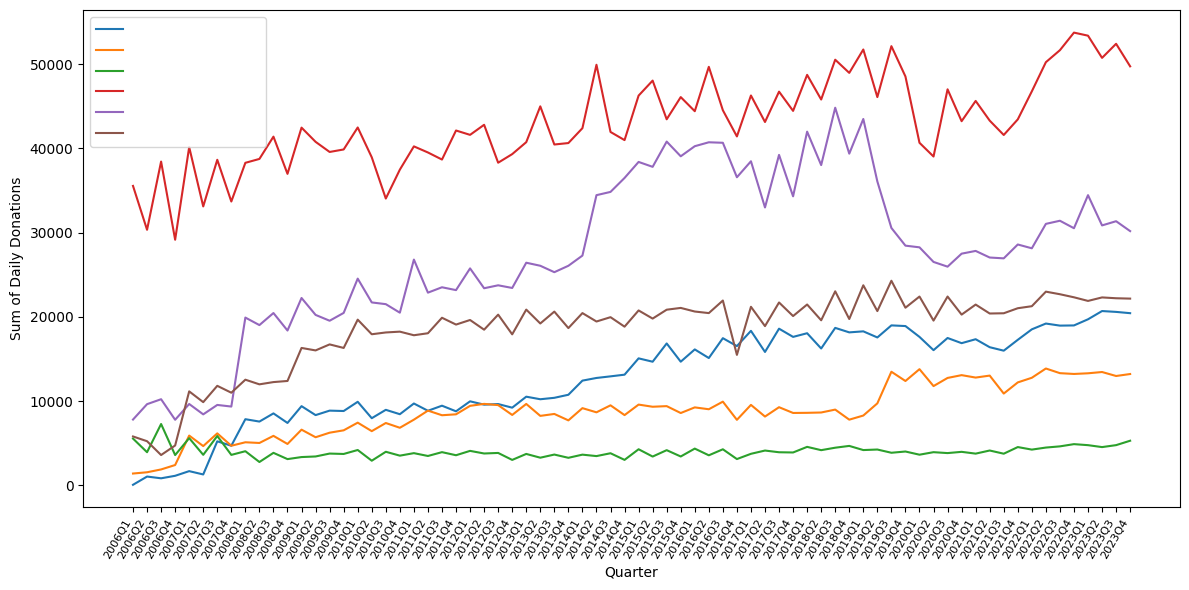

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_donations_facility is your Pandas DataFrame
# Replace this with your actual DataFrame

# Convert the 'date' column to datetime format for proper sorting
df_donations_facility['date'] = pd.to_datetime(df_donations_facility['date'])

# Group by 'date' and 'region' and sum the 'daily' column
df_daily_sum = df_donations_facility.groupby(['date', 'region'])['daily'].sum().reset_index()

# Extract quarter and year from the 'date' column
df_daily_sum['quarter'] = df_daily_sum['date'].dt.to_period("Q")

# Convert 'quarter' to string
df_daily_sum['quarter_str'] = df_daily_sum['quarter'].astype(str)

# Group by 'quarter_str' and 'region' and sum the 'daily' column
df_quarterly_sum = df_daily_sum.groupby(['quarter_str', 'region'])['daily'].sum().reset_index()

# Line plot with quarterly values on the x-axis
plt.figure(figsize=(12, 6))

for region in df_quarterly_sum['region'].unique():
    region_data = df_quarterly_sum[df_quarterly_sum['region'] == region]
    
    # Exclude the last quarter
    region_data = region_data.iloc[:-1]
    
    plt.plot(region_data['quarter_str'], region_data['daily'], label=region)

# Label x-axis
plt.xlabel('Quarter', color='black')  # Set the color of x-axis labels to black

# Label y-axis
plt.ylabel('Sum of Daily Donations')

# Display legend with a black border and white text
legend = plt.legend()
for text in legend.get_texts():
    text.set_color('white')

# Adjusting x-axis label rotation and font size
plt.xticks(rotation=60, ha='right', fontsize=8)

# Adjust spacing between x-axis labels and the plot
plt.tight_layout()

# Show the plot
plt.show()


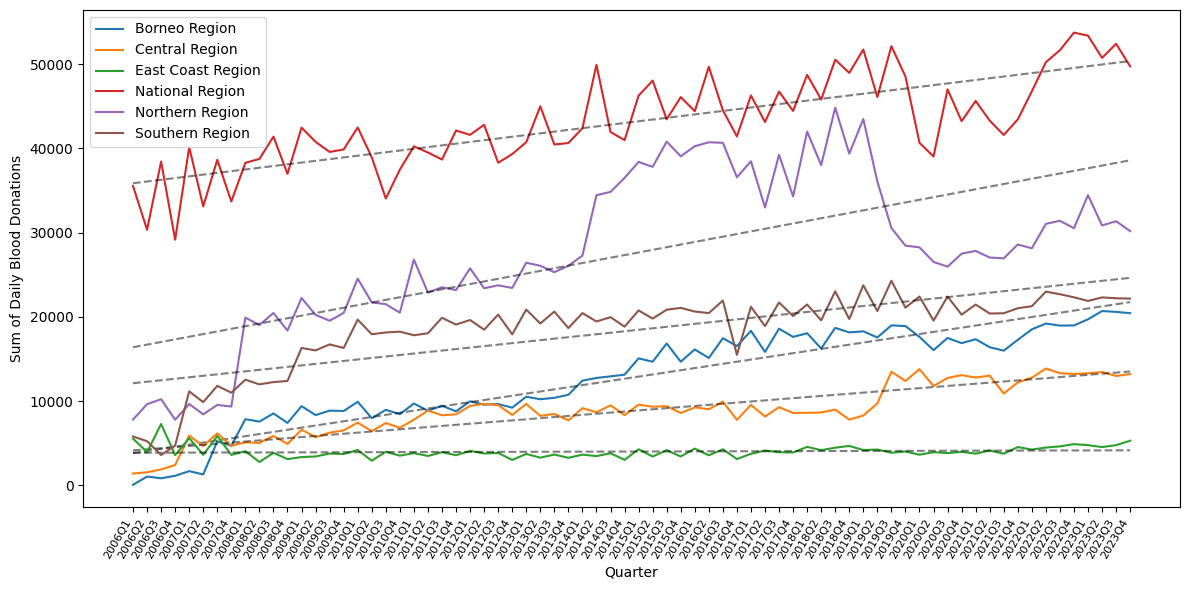

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_donations_facility is your Pandas DataFrame
# Replace this with your actual DataFrame

# Convert the 'date' column to datetime format for proper sorting
df_donations_facility['date'] = pd.to_datetime(df_donations_facility['date'])

# Group by 'date' and 'region' and sum the 'daily' column
df_daily_sum = df_donations_facility.groupby(['date', 'region'])['daily'].sum().reset_index()

# Extract quarter and year from the 'date' column
df_daily_sum['quarter'] = df_daily_sum['date'].dt.to_period("Q")

# Convert 'quarter' to string
df_daily_sum['quarter_str'] = df_daily_sum['quarter'].astype(str)

# Group by 'quarter_str' and 'region' and sum the 'daily' column
df_quarterly_sum = df_daily_sum.groupby(['quarter_str', 'region'])['daily'].sum().reset_index()

# Line plot with quarterly values on the x-axis
plt.figure(figsize=(12, 6))

for region in df_quarterly_sum['region'].unique():
    region_data = df_quarterly_sum[df_quarterly_sum['region'] == region]
    
    # Exclude the last quarter
    region_data = region_data.iloc[:-1]
    
    plt.plot(region_data['quarter_str'], region_data['daily'], label=region)

    # Calculate trend line
    x_values = np.arange(len(region_data))
    y_values = region_data['daily']
    slope, intercept = np.polyfit(x_values, y_values, 1)
    trend_line = slope * x_values + intercept
    plt.plot(region_data['quarter_str'], trend_line, linestyle='--', color='black', alpha=0.5)

# Label x-axis
plt.xlabel('Quarter', color='black')  # Set the color of x-axis labels to black

# Label y-axis
plt.ylabel('Sum of Daily Blood Donations')

# Display legend with a black border and white text
legend = plt.legend()
for text in legend.get_texts():
    text.set_color('black')

# Adjusting x-axis label rotation and font size
plt.xticks(rotation=60, ha='right', fontsize=8)

# Adjust spacing between x-axis labels and the plot
plt.tight_layout()

# Show the plot
plt.show()


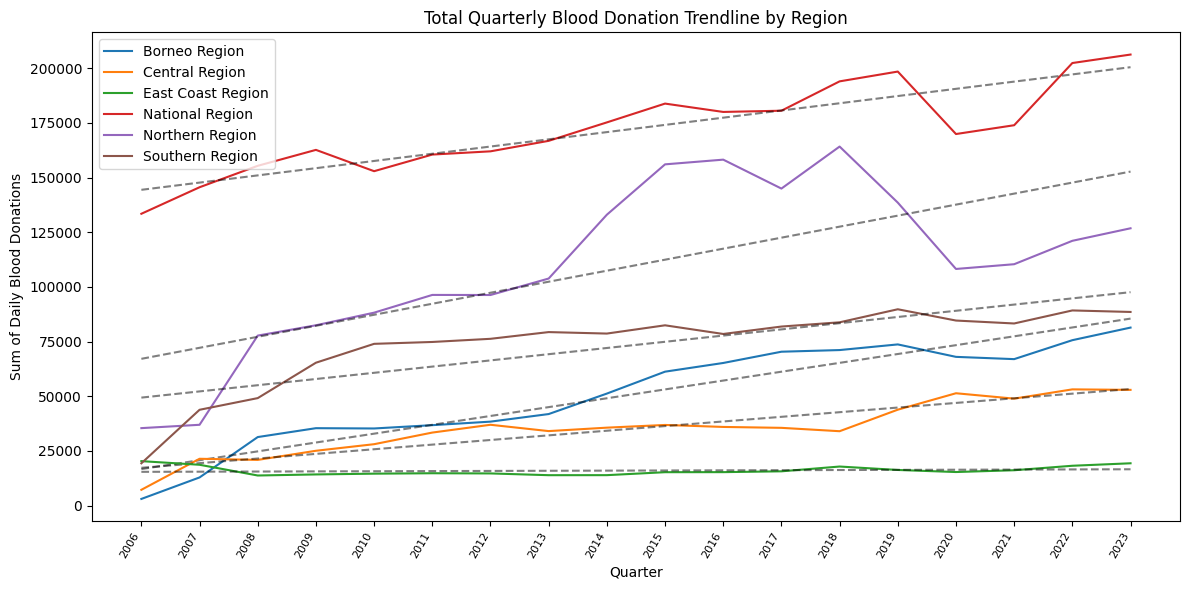

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_donations_facility is your Pandas DataFrame
# Replace this with your actual DataFrame

# Convert the 'date' column to datetime format for proper sorting
df_donations_facility['date'] = pd.to_datetime(df_donations_facility['date'])

# Group by 'date' and 'region' and sum the 'daily' column
df_daily_sum = df_donations_facility.groupby(['date', 'region'])['daily'].sum().reset_index()

# Extract quarter and year from the 'date' column
df_daily_sum['quarter'] = df_daily_sum['date'].dt.to_period("A")

# Convert 'quarter' to string
df_daily_sum['quarter_str'] = df_daily_sum['quarter'].astype(str)

# Group by 'quarter_str' and 'region' and sum the 'daily' column
df_quarterly_sum = df_daily_sum.groupby(['quarter_str', 'region'])['daily'].sum().reset_index()

# Line plot with quarterly values on the x-axis
plt.figure(figsize=(12, 6))

for region in df_quarterly_sum['region'].unique():
    region_data = df_quarterly_sum[df_quarterly_sum['region'] == region]
    
    # Exclude the last quarter
    region_data = region_data.iloc[:-1]
    
    plt.plot(region_data['quarter_str'], region_data['daily'], label=region)

    # Calculate trend line
    x_values = np.arange(len(region_data))
    y_values = region_data['daily']
    slope, intercept = np.polyfit(x_values, y_values, 1)
    trend_line = slope * x_values + intercept
    plt.plot(region_data['quarter_str'], trend_line, linestyle='--', color='black', alpha=0.5)

# Label x-axis
plt.xlabel('Quarter', color='black')  # Set the color of x-axis labels to black

# Label y-axis
plt.ylabel('Sum of Daily Blood Donations')

# Display legend with a black border and white text
legend = plt.legend()
for text in legend.get_texts():
    text.set_color('black')

# Add title
plt.title('Total Quarterly Blood Donation Trendline by Region', color='black')

# Adjusting x-axis label rotation and font size
plt.xticks(rotation=60, ha='right', fontsize=8)

# Adjust spacing between x-axis labels and the plot
plt.tight_layout()

# Show the plot
plt.show()


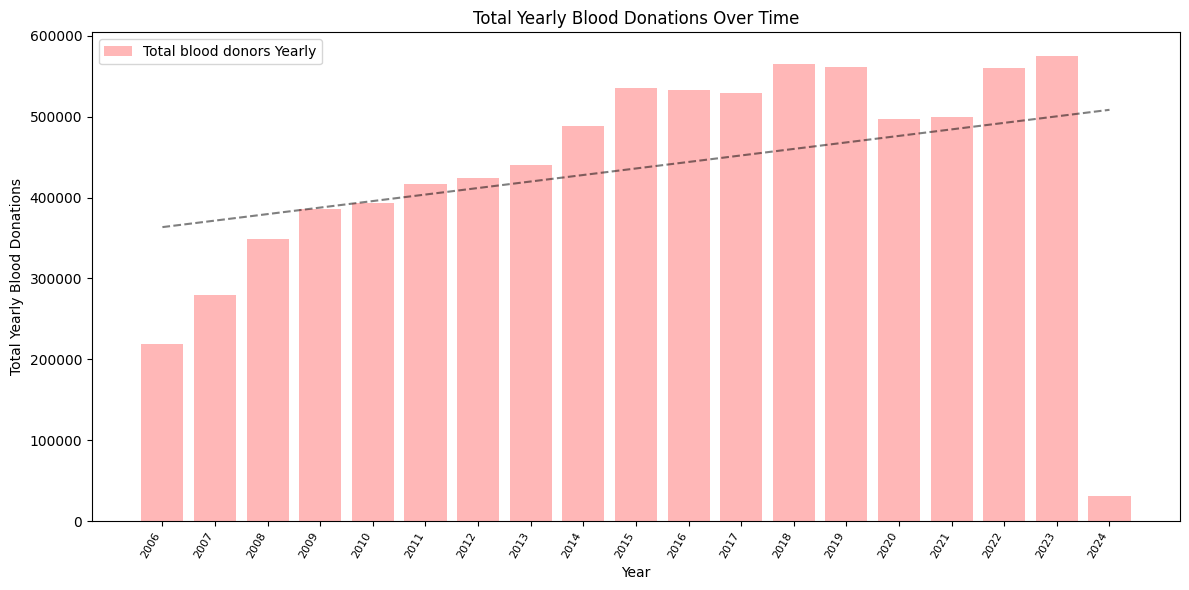

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming df_donations_facility is your Pandas DataFrame
# Replace this with your actual DataFrame

# Convert the 'date' column to datetime format for proper sorting
df_donations_facility['date'] = pd.to_datetime(df_donations_facility['date'])

# Extract year from the 'date' column
df_donations_facility['year'] = df_donations_facility['date'].dt.year

# Convert 'year' to string
df_donations_facility['year_str'] = df_donations_facility['year'].astype(str)

# Group by 'year_str' and sum the 'daily' column
df_yearly_sum = df_donations_facility.groupby('year_str')['daily'].sum().reset_index()

# Define a pastel red color manually
pastel_red = "#FF9999"

# Bar plot with yearly values on the x-axis
plt.figure(figsize=(12, 6))

# Plot bar for total yearly donations with pastel red color
plt.bar(df_yearly_sum['year_str'], df_yearly_sum['daily'], label='Total blood donors Yearly', color=pastel_red, alpha=0.7)

# Calculate trend line for total yearly donations
x_values_total = np.arange(len(df_yearly_sum['year_str']))
slope_total, intercept_total = np.polyfit(x_values_total, df_yearly_sum['daily'], 1)
trend_line_total = slope_total * x_values_total + intercept_total
plt.plot(df_yearly_sum['year_str'], trend_line_total, linestyle='--', color='black', alpha=0.5)

# Label x-axis
plt.xlabel('Year', color='black')  # Set the color of x-axis labels to black

# Label y-axis
plt.ylabel('Total Yearly Blood Donations')

# Add title to the plot
plt.title('Total Yearly Blood Donations Over Time', color='black')

# Display legend with a black border and white text
legend = plt.legend()
for text in legend.get_texts():
    text.set_color('black')

# Adjusting x-axis label rotation and font size
plt.xticks(rotation=60, ha='right', fontsize=8)

# Adjust spacing between x-axis labels and the plot
plt.tight_layout()

# Show the plot
plt.show()


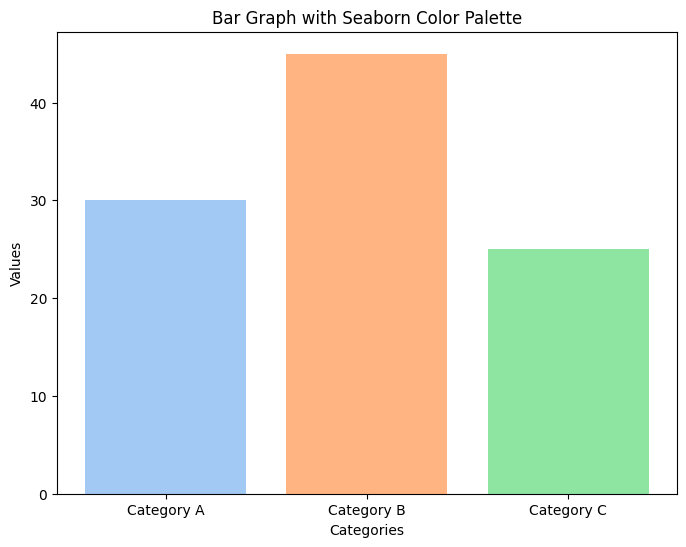

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
categories = ['Category A', 'Category B', 'Category C']
values = [30, 45, 25]

# Choose a color palette from seaborn
colors = sns.color_palette('pastel')

# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=colors)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Graph with Seaborn Color Palette')

# Show the plot
plt.show()


In [11]:
pip install pyarrow


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
# Replace 'path/to/your/local/parquet/file' with the actual path to your Parquet file
parquet_file_path = 'C:\\Users\\User\\Downloads\\blood_donation_retention_2024.parquet'


# Read the Parquet file into a pandas DataFrame
df = pd.read_parquet(parquet_file_path)

# Display the DataFrame
print(df)


        donor_id  visit_date  birth_date
0          00000  2013-11-03        1964
1          00000  2014-05-26        1964
2          00000  2015-01-25        1964
3          00000  2015-08-09        1964
4          00000  2016-03-10        1964
...          ...         ...         ...
6231779    01fCa  2024-01-14        1983
6231780    08JUV  2024-01-14        1976
6231781    00Rtd  2024-01-14        1989
6231782    00UdI  2024-01-14        1981
6231783    01YiB  2024-01-14        1998

[6231784 rows x 3 columns]


Overall Mean Time Difference: 654 days
Blood donors need better retention.


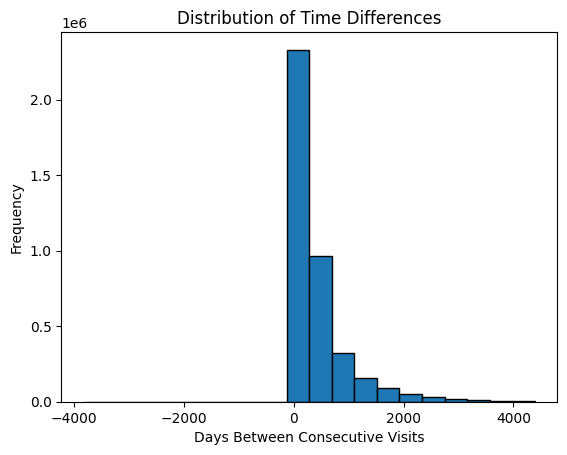

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with the provided data
# If not, you can create it using the data you provided

# Convert 'visit_date' column to datetime
df['visit_date'] = pd.to_datetime(df['visit_date'])

# Calculate the time difference between consecutive visits for each donor
df['time_diff'] = df.groupby('donor_id')['visit_date'].diff()

# Calculate the mean time difference for each donor in days
mean_time_diff = df.groupby('donor_id')['time_diff'].mean()

# Drop NaN values before calculating the overall mean time difference
overall_mean_time_diff = mean_time_diff.dropna().mean()

# Display the overall mean time difference
print(f"Overall Mean Time Difference: {overall_mean_time_diff.days} days")

# Determine how well donors are retained based on the overall mean time difference
desired_threshold = 60  # Set your desired threshold (in days)
if overall_mean_time_diff <= pd.Timedelta(days=desired_threshold):
    print("Blood donors are being retained well.")
else:
    print("Blood donors need better retention.")

# Optionally, you can visualize the distribution of time differences
df['time_diff'].dropna().dt.days.plot(kind='hist', bins=20, edgecolor='black', title='Distribution of Time Differences')
plt.xlabel('Days Between Consecutive Visits')
plt.ylabel('Frequency')
plt.show()


Overall Mean Time Difference: 654 days


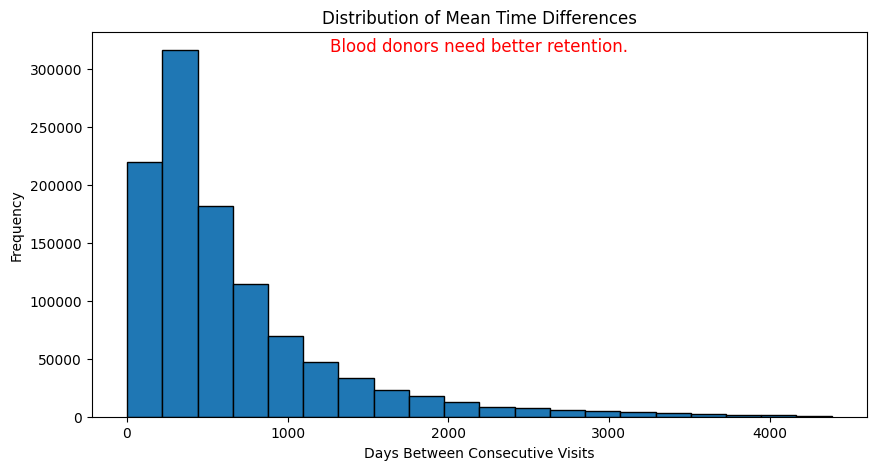

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with the provided data
# If not, you can create it using the data you provided

# Convert 'visit_date' column to datetime
df['visit_date'] = pd.to_datetime(df['visit_date'])

# Calculate the time difference between consecutive visits for each donor
df['time_diff'] = df.groupby('donor_id')['visit_date'].diff()

# Calculate the mean time difference for each donor in days
mean_time_diff = df.groupby('donor_id')['time_diff'].mean()

# Drop NaN values before calculating the overall mean time difference
overall_mean_time_diff = mean_time_diff.dropna().mean()

# Display the overall mean time difference
print(f"Overall Mean Time Difference: {overall_mean_time_diff.days} days")

# Determine how well donors are retained based on the overall mean time difference
desired_threshold = 60  # Set your desired threshold (in days)
if overall_mean_time_diff <= pd.Timedelta(days=desired_threshold):
    retention_status = "Blood donors are being retained well."
else:
    retention_status = "Blood donors need better retention."

# Create a plot for overall mean time difference
plt.figure(figsize=(10, 5))
mean_time_diff_in_days = mean_time_diff.dropna().dt.days
mean_time_diff_in_days.plot(kind='hist', bins=20, edgecolor='black', title='Distribution of Mean Time Differences')
plt.xlabel('Days Between Consecutive Visits')
plt.ylabel('Frequency')

# Annotate the plot with the retention status
plt.annotate(retention_status, xy=(0.5, 0.95), xycoords='axes fraction', ha='center', fontsize=12, color='red')

plt.show()




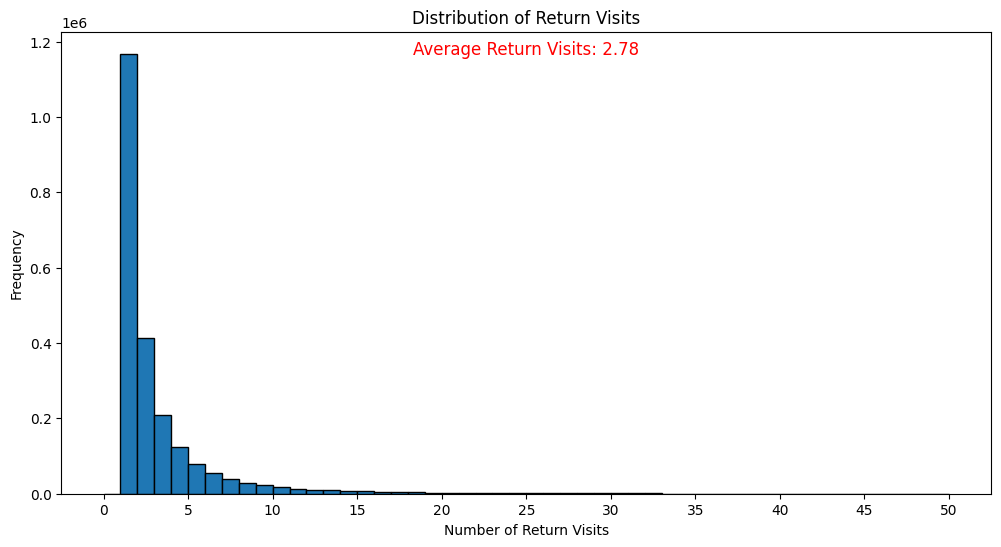

Average Number of Return Visits: 2.78


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with the provided data
# If not, you can create it using the data you provided

# Create a plot for the number of return visits
return_visits = df.groupby('donor_id').size()
plt.figure(figsize=(12, 6))

# Increase the number of bins for more detailed data
plt.hist(return_visits, bins=np.arange(0, 51, 1), edgecolor='black')  

plt.title('Distribution of Return Visits')
plt.xlabel('Number of Return Visits')
plt.ylabel('Frequency')

# Set x-axis ticks up to 50 with intervals of 5
plt.xticks(np.arange(0, 51, 5))

# Calculate and annotate the average number of return visits
average_return_visits = return_visits.mean()
plt.annotate(f'Average Return Visits: {average_return_visits:.2f}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', fontsize=12, color='red')

plt.show()

# Print the average number of return visits
print(f"Average Number of Return Visits: {average_return_visits:.2f}")


In [ ]:
pip install python-telegram-bot



In [ ]:
pip install --upgrade anyio


In [ ]:
import asyncio
from telegram import Bot
from telegram import InputFile
import nest_asyncio
nest_asyncio.apply()

async def send_image():
    # Replace 'YOUR_BOT_TOKEN' with the actual token you obtained from the BotFather
    bot = Bot(token='6812350682:AAGEa2DZdNczIldf0orRZjA2Afv6mysLk6o')

    # Replace 'PATH_TO_YOUR_IMAGE' with the actual path to your image file
    image_path = 'C:\\Users\\User\\Downloads\\trend.png'

    # Send the image
    with open(image_path, 'rb') as image_file:
        await bot.send_photo(chat_id='@https://t.me/+5G0q5gux5oA0NGZl', photo=InputFile(image_file))

    # Replace 'CHAT_ID' with the correct chat ID (numeric) where you want to send the image
    chat_id = -100123456789  # Example chat ID, replace with the actual one

    # Send the image
    with open(image_path, 'rb') as image_file:
        await bot.send_photo(chat_id=chat_id, photo=InputFile(image_file))

# Run the asynchronous function
await send_image()

In [ ]:
from telegram import Bot
from telegram import InputFile

# Replace 'YOUR_BOT_TOKEN' with your actual bot token
bot = Bot(token='6812350682:AAGEa2DZdNczIldf0orRZjA2Afv6mysLk6o')

# Replace 'CHAT_ID' with the chat ID where you want to send the photo
chat_id = '699967707'

# Replace 'path/to/your/photo.jpg' with the actual path to your photo
photo_path = 'C:\\Users\\User\\Downloads\\trend.png'

# Send the photo
with open(photo_path, 'rb') as photo_file:
    bot.send_photo(chat_id=chat_id, photo=InputFile(photo_file))


In [ ]:

import sys
import time
import random
import datetime
import telepot

bot.send_photo(chat_id, photo=open('path', 'rb'))